<a href="https://colab.research.google.com/github/yasyamauchi/education/blob/main/decision_tree_BME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 決定木 (けっていぎ，decision tree)  
  
[Google Machine Learning: 上級コース: デシジョンフォレスト](https://developers.google.com/machine-learning/decision-forests/practice?hl=ja)より  

TF-DF（TensorFlow デシジョン フォレスト）ライブラリを使用する．

## 準備  
  
  メッセージがたくさん出るが気にしない．

In [1]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 79.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing insta

In [2]:
import numpy as np
import pandas as pd
import tensorflow_decision_forests as tfdf

## データの読み込み  
  
  この例では"Palmer Penguins"データセットを使用する．  
### データの中身  
3種類のペンギン(合計344羽)  
* チンストラップ(Chinstrap)
* ジェンツー(Gentoo)
* アデリー(Adelie)  
  
の，次のデータを使用する．  
* 生息地 (island)
* くちばしの長さ (bill_length)
* くちばしの上下幅 (bill_depth)
* 羽の長さ (flipper_length)
* 体重 (body_mass)
* 性別 (sex)
* 誕生年？ (year)  
  
最初の3羽のデータを表示する．

In [3]:
path = "https://storage.googleapis.com/download.tensorflow.org/data/palmer_penguins/penguins.csv"
pandas_dataset = pd.read_csv(path)

# Display the first 3 examples.
pandas_dataset.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['bill_length_mm'].plot(kind='hist', bins=20, title='bill_length_mm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['bill_depth_mm'].plot(kind='hist', bins=20, title='bill_depth_mm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['flipper_length_mm'].plot(kind='hist', bins=20, title='flipper_length_mm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='bill_length_mm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='bill_length_mm', y='bill_depth_mm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='bill_depth_mm', y='flipper_length_mm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='flipper_length_mm', y='body_mass_g', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['bill_depth_mm']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('bill_depth_mm')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['body_mass_g']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('body_mass_g')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['bill_length_mm']
  ys = series['bill_depth_mm']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('bill_length_mm', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('bill_length_mm')
_ = plt.ylabel('bill_depth_mm')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['bill_length_mm'].plot(kind='line', figsize=(8, 4), title='bill_length_mm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['bill_depth_mm'].plot(kind='line', figsize=(8, 4), title='bill_depth_mm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['flipper_length_mm'].plot(kind='line', figsize=(8, 4), title='flipper_length_mm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='bill_length_mm', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='bill_depth_mm', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='flipper_length_mm', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

ラベルを確認する．文字列のままではわかりづらいので，ペンギンの種については整数ラベルに変換する．

In [4]:
label = "species"

classes = list(pandas_dataset[label].unique())
print(f"Label classes: {classes}")
# >> Label classes: ['Adelie', 'Gentoo', 'Chinstrap']

pandas_dataset[label] = pandas_dataset[label].map(classes.index)

Label classes: ['Adelie', 'Gentoo', 'Chinstrap']


整数に変換した様子を見る．

In [13]:
print(pandas_dataset[label])

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: int64


## 訓練データと検証データに分ける  
  
344のデータの約1割を検証データに，残りを訓練データに分ける．ランダムに分けるので実行するたびに結果は異なる．

In [5]:
np.random.seed(1)
# Use the ~10% of the examples as the testing set
# and the remaining ~90% of the examples as the training set.
test_indices = np.random.rand(len(pandas_dataset)) < 0.1
pandas_train_dataset = pandas_dataset[~test_indices]
pandas_test_dataset = pandas_dataset[test_indices]

print("Training examples: ", len(pandas_train_dataset))
# >> Training examples: 309

print("Testing examples: ", len(pandas_test_dataset))
# >> Testing examples: 35

Training examples:  309
Testing examples:  35


## モデルの学習  
  
デフォルト値で行う．学習はすぐ終わる．

In [6]:
tf_train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(pandas_train_dataset, label=label)
model = tfdf.keras.CartModel()
model.fit(tf_train_dataset)

Use /tmp/tmp2b818lhj as temporary training directory
Reading training dataset...
Training dataset read in 0:00:03.792799. Found 309 examples.
Training model...
Model trained in 0:00:00.021973
Compiling model...
Model compiled.


## モデルの評価
  
  まず決定木を表示する．見方は次の通り．  
* 左から右に見る
* 赤(0)がアデリー，青(1)がジェンツー，緑(2)がチンストラップ
* 分類された結果が棒グラフで表示されており，その上に条件が示されている．例えば最初の**flipper_length_mm >= 206.500**は**「羽の長さが206.5mm以上かどうか」**を意味する．Yesが上でNoが下．
* マウスを用いると，詳細な数字が表示される．

In [7]:
tfdf.model_plotter.plot_model_in_colab(model, max_depth=10)

精度を計算する．訓練データ・検証データで共に97％程度となる．実際の精度は実行するたびにわずかに異なる(理由は考えること)．

In [8]:
model.compile("accuracy")
print("Train evaluation: ", model.evaluate(tf_train_dataset, return_dict=True))
# >> Train evaluation:  {'loss': 0.0, 'accuracy': 0.96116}

tf_test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(pandas_test_dataset, label=label)
print("Test evaluation: ", model.evaluate(tf_test_dataset, return_dict=True))
# >> Test evaluation:  {'loss': 0.0, 'accuracy': 0.97142}

1/1 [==============================] - 0s 485ms/step - loss: 0.0000e+00 - accuracy: 0.9709
Train evaluation:  {'loss': 0.0, 'accuracy': 0.9708737730979919}
1/1 [==============================] - 0s 124ms/step - loss: 0.0000e+00 - accuracy: 0.9714
Test evaluation:  {'loss': 0.0, 'accuracy': 0.9714285731315613}


## モデルの改良(Keras tunerの利用)

### Keras-tunerのインストール

In [9]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.8 MB/s eta 0:00:00


### 最適化するパラメータの指定
  
次のパラメータをいくつかの候補を設けて検討する
* 決定木の深さ (min_examples)
* 検証データの割合 (validation_ratio)

In [10]:
import keras_tuner as kt

def build_model(hp):
  model = tfdf.keras.CartModel(
      min_examples=hp.Choice("min_examples",
          # Try four possible values for "min_examples" hyperparameter.
          # min_examples=10 would limit the growth of the decision tree,
          # while min_examples=1 would lead to deeper decision trees.
         [1, 2, 5, 10]),
      validation_ratio=hp.Choice("validation_ratio",
         # Three possible values for the "validation_ratio" hyperparameter.
         [0.0, 0.05, 0.10]),
      )
  model.compile("accuracy")
  return model

tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=10,
    directory="/tmp/tuner",
    project_name="tune_cart")

tuner.search(x=tf_train_dataset, validation_data=tf_test_dataset)
best_model = tuner.get_best_models()[0]

print("Best hyperparameters: ", tuner.get_best_hyperparameters()[0].values)
# >> Best hyperparameters:  {'min_examples': 2, 'validation_ratio': 0.0}

Trial 10 Complete [00h 00m 02s]
val_accuracy: 0.8857142925262451

Best val_accuracy So Far: 0.9714285731315613
Total elapsed time: 00h 00m 16s
Use /tmp/tmpuszc3a5z as temporary training directory
Best hyperparameters:  {'min_examples': 1, 'validation_ratio': 0.0}


### 改良したモデルの評価

残念ながら精度はさほど上がっていない．決定木は以前よりも深くなっている．

In [11]:
model = tfdf.keras.CartModel(min_examples=2, validation_ratio=0.0)
model.fit(tf_train_dataset)

model.compile("accuracy")
print("Test evaluation: ", model.evaluate(tf_test_dataset, return_dict=True))
# >> Test evaluation:  {'loss': 0.0, 'accuracy': 1.0}

Use /tmp/tmp7oeqsgyw as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.170931. Found 309 examples.
Training model...
Model trained in 0:00:00.022627
Compiling model...
Model compiled.
1/1 [==============================] - 0s 112ms/step - loss: 0.0000e+00 - accuracy: 0.9714
Test evaluation:  {'loss': 0.0, 'accuracy': 0.9714285731315613}


In [12]:
tfdf.model_plotter.plot_model_in_colab(model, max_depth=10)

# ランダムフォレスト (random forest)
  
  [In Depth: Decision Trees and Random Forests](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.08-Random-Forests.ipynb#scrollTo=hxFuYYC3G3eL)より  
  
  この例では決定木の例と異なり，scikit-learn(sklearn)を使用するので，コードは異なる．

## 決定木と過学習

分類用データを準備する．scikit-learnで4クラス・300個の二次元データを人工的に発生させる．

In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

<ipython-input-33-164f59effc58>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


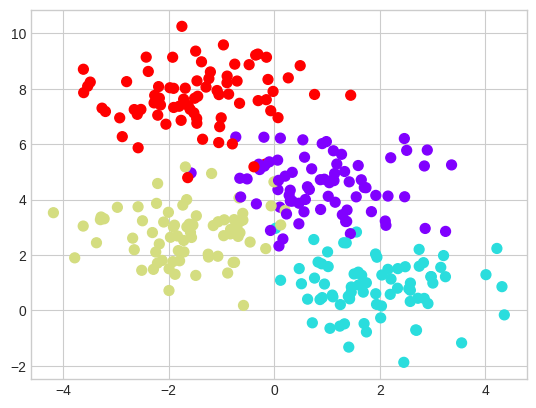

In [34]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

決定木でモデルを作成する．

In [35]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [41]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

学習結果を見てみよう．

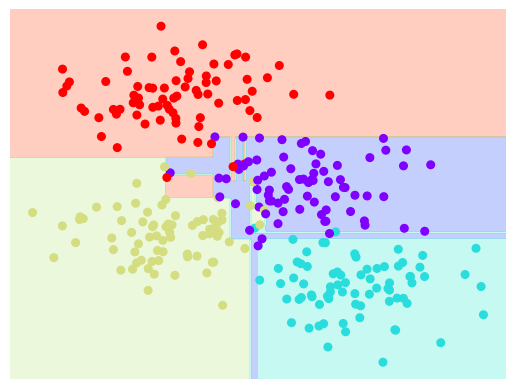

In [42]:
visualize_classifier(DecisionTreeClassifier(), X, y)

おおむね正しく分類されているが，一部分で明らかな過学習(恣意的に見える分類区画)があるのが分かるだろうか．決定木は深くなれば深くなるほど精度は向上するが，このような過学習が発生する．

## ランダムフォレストの適用

ここでは「バギング」(bagging)という方法を用いる．バギングはデータの一部分を抽出して学習することを繰り返し(ランダムな決定木)，最後に平均化する方法である．  
次の例では決定木の数を100として，各々で全体の8割のデータをランダムに抽出する．

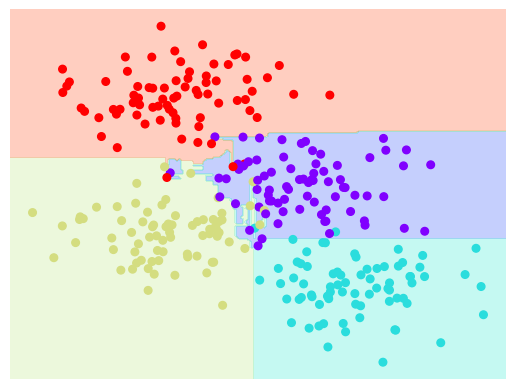

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

精度を求める．分類誤りは1個ぐらいのはず．

In [32]:
z = bag.predict(X)
nerror = 0
for i in range(len(y)):
  if y[i] != z[i]:
    nerror += 1
print("accuracy={}".format(1-nerror/len(y)))

accuracy=0.9966666666666667
